In [1]:
import numpy as np
import scipy as sp
import os
import sys

In [2]:
import math
import random

![title](img/htw_cr.png)

Aufgabe 1 anlegen eines Notebooks: 

- aus einen Gegebenen Polynom die Nullstellen und Polstellen berechnen 
- aus den Koeffizienten muss sich die Systemübertragungsfunktion darstellen lassen
- aus den Koeffizienten muss sich auch der Phasengang dargestellt werden.

Input: 
- Polynom

Output: 
- Nullstellen
- Polstellen
- Systemübertragungsfunktion
- Phasengang

In [3]:
from tqdm.notebook import tqdm as tqdm
from ipywidgets import IntProgress

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [5]:
# steps----------------------------------------------------------------
#books: 
    # 1 # Thomas Frey, Martin Bossert (auth.) - Signal- und Systemtheorie (2009, Vieweg+Teubner Verlag)
    # 2 # [Springer-Lehrbuch] Jens-Rainer Ohm, Hans Dieter Lüke (auth.) - Signalübertragung_ Grundlagen der digitalen und analogen Nachrichtenübertragungssysteme (2014, Vieweg+Teubner Verlag)

In [6]:
random.seed(44)

In [7]:
import multiprocessing

In [8]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [9]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7172140065985658010
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14730109901772368755
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17311244754513774706
physical_device_desc: "device: XLA_CPU device"
]


In [11]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

This will print whether your tensorflow is using a CPU or a GPU backend. If you are running this command in jupyter notebook, check out the console from where you have launched the notebook.

In [12]:
print(sess)

Basic System Elements

![title](img/linearitaet_system.png)

Spezielle diskrete LTI-Systeme

![title](img/tapped_delay_line_direktform_FIR.png)

Delay element created.
Delay element created.
[0.1, 0.57, 2.642, 2.9920000000000004, 0.9460000000000001, 0.758, 1.71, 2.344, 1.6]
[1.5739999999999998, 3.6, 0.08, 0.38399999999999995, 1.932, 1.608, 3.7760000000000002, 2.7580000000000005, 1.6500000000000001, 2.126, 0.752]
[0.02, 0.086, 0.4]
random signals
[[6, 8, 8, 1, 2, 6, 3, 4, 0, 3], [1, 9, 0, 1, 2, 8, 4, 6, 9, 6], [5, 5, 1, 5, 4, 9, 2, 1, 8, 1], [9, 1, 4, 5, 1, 4, 0, 5, 6, 1], [7, 7, 3, 3, 2, 4, 3, 0, 0, 6], [0, 5, 5, 7, 7, 9, 8, 2, 3, 7], [7, 5, 9, 0, 4, 2, 0, 3, 0, 9], [9, 8, 8, 4, 5, 9, 3, 6, 1, 5], [5, 1, 3, 9, 0, 6, 0, 9, 7, 1], [2, 2, 0, 9, 4, 1, 4, 1, 0, 6]]
transfer functions for the random signals above
[[0.258, 1.2000000000000002, 0.12, 0.676, 3.248, 3.9080000000000004, 3.326, 0.692, 1.3760000000000001, 2.7380000000000004, 1.544, 1.6600000000000001], [4.116, 2.4000000000000004, 0.02, 0.266, 1.174, 3.62, 0.126, 0.732, 1.568, 3.664, 2.2960000000000003, 3.2940000000000005], [3.286, 0.4, 0.1, 0.5299999999999999, 2.45, 2.186, 0

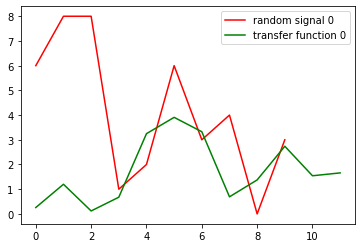

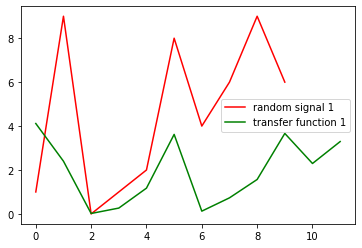

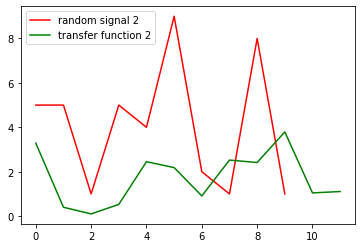

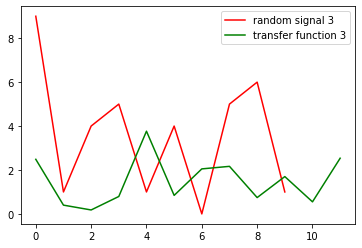

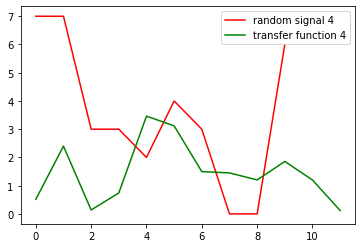

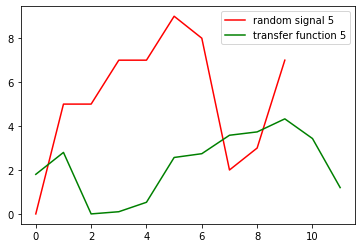

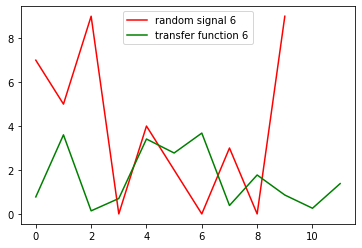

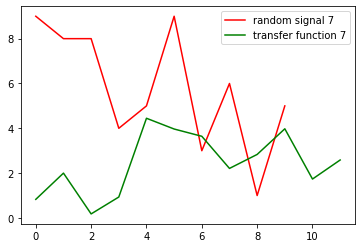

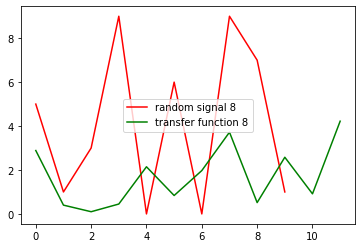

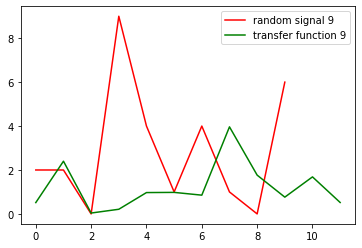

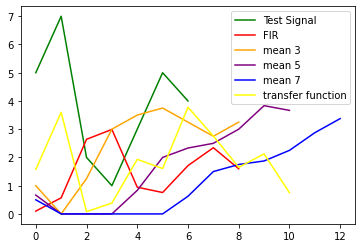

In [13]:
class LTI_FIR_Sys(object):
    amount_of_coef = 0
    coef_list = []
    amount_delay_elements = 0
    delay_list = []
    fir_list = []
    finite_impulse_response = []
    transfer_function = []
    transfer_function_frey = []
    class DelayElement(object):
        new_input = 0
        output_value = 0
        is_integrated_in_processing_chain = False
        def __init__(self):
            print("Delay element created.")
        def get_output(self):
            return self.output_value
        def update_input(self, new_value_passed):
            self.new_input = new_value_passed
        def update_output(self, new_value_passed):
            self.output_value = new_value_passed
        def get_processing_flag(self):
            return self.is_integrated_in_processing_chain
        def set_integration_flag(self, passed_flag):           
            self.is_integrated_in_processing_chain = passed_flag
        
    def __init__(self, initial_coef_list):
        #print("under construction")
        self.amount_of_coef = len(initial_coef_list)
        self.coef_list = initial_coef_list
        self.amount_delay_elements = len(initial_coef_list) - 1
        for i in range(self.amount_delay_elements):
            created_delay_element = self.DelayElement()
            self.delay_list.append(created_delay_element)
    
    def update_delays_elements(self, new_starting_chainvalue):
        #print("under construction")
        temp_even = 0
        temp_odd = 0
        for i in range(self.amount_delay_elements):       
            if i == 0:
                temp_odd = self.delay_list[i].get_output()
                self.delay_list[i].update_input(new_starting_chainvalue)
                self.delay_list[i].update_output(new_starting_chainvalue)                
                if self.delay_list[i].get_processing_flag() == False:
                    self.delay_list[i].set_integration_flag(True)
                    break
            elif (i > 0) and (i <=1) and (i % 2 > 0):
                temp_even = self.delay_list[i].get_output()
                self.delay_list[i].update_input(temp_odd)
                self.delay_list[i].update_output(temp_odd)
                if self.delay_list[i].get_processing_flag() == False:
                    self.delay_list[i].set_integration_flag(True)
                    break
            elif (i > 1) and (i % 2 == 0):
                temp_odd = self.delay_list[i].get_output()
                self.delay_list[i].update_input(temp_even)
                self.delay_list[i].update_output(temp_even)
                if self.delay_list[i].get_processing_flag() == False:
                    self.delay_list[i].set_integration_flag(True)
                    break
            elif (i > 1) and (i % 2 > 0):
                temp_even = self.delay_list[i].get_output()
                self.delay_list[i].update_input(temp_odd)
                self.delay_list[i].update_output(temp_odd)
                if self.delay_list[i].get_processing_flag() == False:
                    self.delay_list[i].set_integration_flag(True)
                    break                                            
                
    def calculate_finite_impulse_response(self, passed_signal):
        '''pas a signal in argument in form of a list'''
        #print("under construction")
        lengh_signal = len(passed_signal)   
        loop_lengh = lengh_signal + self.amount_delay_elements
        #print(loop_lengh)
        #generate new adjusted input signal
        adjusted_input_signal = []
        for i in range(loop_lengh):
            if i <= (lengh_signal - 1):
                adjusted_input_signal.append(passed_signal[i])
            else:
                adjusted_input_signal.append(0)
        #print("adjusted input signal: {}".format(adjusted_input_signal))
        #pass the signal through the system
        integration_counter_flag = False
        for process_index in range(loop_lengh):            
            time_sum_value = 0
            if process_index > self.amount_delay_elements:
                integration_counter_flag = True
            for i in range(len(self.coef_list)):
                if i == 0:
                    time_sum_value += self.coef_list[i] * adjusted_input_signal[process_index]
                else:
                    #for delay_index in range(self.amount_delay_elements):
                    temp_output_delay = self.delay_list[i-1].get_output()
                    #print(temp_output_delay)
                    #print("mal")
                    #print(self.coef_list[i])
                    #print("ergebnis: {}".format(self.coef_list[i]*temp_output_delay))
                    time_sum_value += self.coef_list[i] * self.delay_list[i-1].get_output()         
            self.finite_impulse_response.append(time_sum_value)
            #update the delay elements
            #print("outsourced in other function")
            self.update_delays_elements(adjusted_input_signal[process_index])
    
    def mean(self, signal, n):
        '''first input argument is the signal in form of a list'''
        '''second argument is the gliding mean value kernel n as positive integer this value has to be an odd number'''
        '''the return value is a list of a mean of the input signal'''
        signal_length = len(signal)
        loop_range_helper_coefs = 2*(n) - 1
        loop_range = signal_length + n - 1
        output_mean_signal = []
        #initialize output signal
        zero_buffer_adjusted = False
        signal_is_implemented = False
        counter_zero_buffer = 0
        #create helper array for Xk coeffs
        helper_coefs = []
        for i in range(loop_range_helper_coefs):
            if (counter_zero_buffer < (n)) and (zero_buffer_adjusted == False):
                counter_zero_buffer += 1
                helper_coefs.append(0)
                if counter_zero_buffer == (n-1):
                    zero_buffer_adjusted = True
                    continue
            if (zero_buffer_adjusted == True) and (counter_zero_buffer == n - 1):
                for x in range(signal_length):
                    helper_coefs.append(signal[x])                
                    counter_zero_buffer-=1                
                signal_is_implemented = True
                continue
            if signal_is_implemented == True: 
                helper_coefs.append(0) #needs extra condition at the end
        #build mean vlaue  
        for i in range(loop_range):
            entry_value_x_refined = 0
            target_index = i
            # for index_mean in range(n):
            #     target_index =  i - index_mean
            #     entry_value_x_refined += helper_coefs[target_index - index_mean]
            #     entry_value_x_refined = entry_value_x_refined * 1/(n+1)
            entry_value_x_refined += sum( 
                (1/(n+1)) * helper_coefs[target_index - index_mean] for index_mean in range(n + 1) 
            )
            output_mean_signal.append(entry_value_x_refined)     
        return output_mean_signal, helper_coefs

    def generate_transfer_function(self, passed_test_function = list(), calculate_formula_from_frey_script = bool()):
        #print("under construction ...")
        #self.transfer_function_frey
        intern_test_signal_FIR = []
        have_to_return_function = False
        #if type(passed_test_function) == type(list):
        if isinstance(passed_test_function, list):
            if (len(passed_test_function) == 0):
                intern_test_signal_FIR =  [4, 2, 8, 6, 3, 5, 1, 2, 9]
            else:
                intern_test_signal_FIR = passed_test_function
                have_to_return_function = True
        else:
            intern_test_signal_FIR =  [4, 2, 8, 6, 3, 5, 1, 2, 9]
        #if type(calculate_formula_from_frey_script) == type(bool):
        if isinstance(calculate_formula_from_frey_script, bool):
            if calculate_formula_from_frey_script == True:
                #create dirac function
                h = []
                for i in range(len(self.coef_list)):
                    entry = 0
                    entry = self.coef_list[i] * 1
                    h.append(entry)
                self.transfer_function_frey = h
        adjusted_input_test_signal_FIR = []
        adjusted_cels = 2 
        transfer_function = []
        for i in range(adjusted_cels):
            if len(self.coef_list) > 0:
                if adjusted_cels > 0:
                    adjusted_input_test_signal_FIR.append(0)
                    adjusted_cels -= 1
            else:
                print("coef. list is empty")
                return None
        if adjusted_cels == 0:
            for x in range(len(intern_test_signal_FIR)):
                adjusted_input_test_signal_FIR.append(intern_test_signal_FIR[x])  
        # for i in range(2):
        #     adjusted_input_test_signal_FIR.append(0)
        #build transfer function
        for i_entry in range(len(adjusted_input_test_signal_FIR)):
            entry_in_transfer_function_timeslot = 0
            for i in range(len(self.coef_list)):
                target_index = i_entry
                entry_in_transfer_function_timeslot +=  self.coef_list[i] * adjusted_input_test_signal_FIR[target_index-i] 
            transfer_function.append(entry_in_transfer_function_timeslot) 
        if have_to_return_function:            
            return transfer_function
        else:
            self.transfer_function = transfer_function


##execution________________________________________________________________
test_signal_FIR =  [5, 7, 2, 1, 3, 5, 4]
my_sys = LTI_FIR_Sys([0.02, 0.086, 0.4])
my_sys.calculate_finite_impulse_response(test_signal_FIR)
print(my_sys.finite_impulse_response)
#print(my_sys.coef_list)
#print(my_sys.delay_list)
mean_level5 = 5
mean_level_label5 = str(mean_level5)
mean_test_signal5 = my_sys.mean(test_signal_FIR, mean_level5)
mean_level3 = 3
mean_level_label3 = str(mean_level3)
mean_test_signal3 = my_sys.mean(test_signal_FIR, mean_level3)
mean_level7 = 7
mean_level_label7 = str(mean_level7)
mean_test_signal7 = my_sys.mean(test_signal_FIR, mean_level7)
my_sys.generate_transfer_function(calculate_formula_from_frey_script=True)
print(my_sys.transfer_function)
print(my_sys.transfer_function_frey)
amount_of_signals = 10
list_of_random_signals = []
list_of_transfer_functions = []
for i in range(amount_of_signals):
    signal_entry = []
    for x in range(10):
        signal_entry.append(random.randint(0, 9))
    list_of_random_signals.append(signal_entry)
print("random signals")
print(list_of_random_signals)

for i in range(len(list_of_random_signals)):
    transfer_function = list()
    transfer_function = my_sys.generate_transfer_function(passed_test_function=list_of_random_signals[i])
    list_of_transfer_functions.append(transfer_function)
print("transfer functions for the random signals above")
print(list_of_transfer_functions)
print("ploting functions")
for i in range(len(list_of_transfer_functions)):
    plt.figure()
    plt.plot(list_of_random_signals[i], label='random signal '+str(i), color='red')
    plt.plot(list_of_transfer_functions[i], label='transfer function '+str(i), color='green')
    plt.legend()
    plt.show()
# print(mean_test_signal3)
# print(mean_test_signal5)
# print(mean_test_signal7)
#ploting_graphs____________________________________________________________
plt.figure()
plt.plot(test_signal_FIR, label='Test Signal', color='green')
plt.plot(my_sys.finite_impulse_response, label='FIR', color='red')
plt.plot(mean_test_signal3[0], label='mean '+mean_level_label3, color='orange')
plt.plot(mean_test_signal5[0], label='mean '+mean_level_label5, color='purple')
plt.plot(mean_test_signal7[0], label='mean '+mean_level_label7, color='blue')
plt.plot(my_sys.transfer_function, label='transfer function', color='yellow')
plt.legend()
plt.show()

![title](img/zweite_transponierte_direktform_IIR.png)

Delay element created.
Delay element created.
Delay element created.
test signal: [5, 7, 2, 1, 3, 5, 4]
y(x) from test signal: [2.0, 6.800000000000001, 12.830000000000002, 23.532, 45.074000000000005, 84.76200000000001, 157.246]
plot stuff


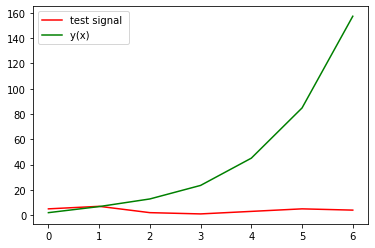

In [14]:
class LTI_IIR_Sys(object):
    #print("initialization")
    amount_of_a_coefs = 0
    a_coef_list = []
    amount_of_b_coefs = 0
    b_coef_list = []
    delay_list = []
    finite_impulse_response = []
    transfer_function = []
    
    class DelayElement(object):
        new_input = 0
        output_value = 0
        is_integrated_in_processing_chain = False
        def __init__(self):
            print("Delay element created.")
        def get_output(self):
            return self.output_value
        def update_input(self, new_value_passed):
            self.new_input = new_value_passed
        def update_output(self, new_value_passed):
            self.output_value = new_value_passed
        def get_processing_flag(self):
            return self.is_integrated_in_processing_chain
        def set_integration_flag(self, passed_flag):           
            self.is_integrated_in_processing_chain = passed_flag

    def __init__(self, a_init_coef_list, b_init_coef_list):
        #print("under construction")
        self.a_coef_list = a_init_coef_list
        self.amount_of_a_coefs = len(a_init_coef_list)
        self.b_coef_list = b_init_coef_list
        self.amount_of_b_coefs = len(b_init_coef_list)
        for i in range(len(b_init_coef_list)):
            created_delay_element = self.DelayElement()
            self.delay_list.append(created_delay_element)
    
    def calculate_y_from_x(self, passed_signal):
        signal_length = len(passed_signal)
        output_signal = []
        for i_timeframe in range(signal_length):
            current_output_timeframe = passed_signal[i_timeframe] * self.b_coef_list[len(self.b_coef_list)-1]+self.delay_list[0].get_output()
            #update the other delay elements
            b_coef_counter = self.amount_of_b_coefs - 1
            a_coef_counter = self.amount_of_a_coefs - 1
            for i_delays in range(len(self.delay_list)):                                
                if i_delays == (len(self.delay_list)-1) and (b_coef_counter == 0) and (a_coef_counter == -1):
                    delay_update_value = current_output_timeframe * self.a_coef_list[0] + self.b_coef_list[0] * passed_signal[i_timeframe]
                    self.delay_list[i_delays].update_input(delay_update_value)
                    self.delay_list[i_delays].update_output(delay_update_value)
                else:
                    delay_update_value = self.delay_list[i_delays + 1].get_output() + current_output_timeframe * self.a_coef_list[a_coef_counter] + self.b_coef_list[b_coef_counter] * passed_signal[i_timeframe]
                    self.delay_list[i_delays].update_input(delay_update_value)
                    self.delay_list[i_delays].update_output(delay_update_value)
                    b_coef_counter -= 1
                    a_coef_counter -= 1
            output_signal.append(current_output_timeframe)
        return output_signal
         
##execution________________________________________________________________
test_signal_FIR =  [5, 7, 2, 1, 3, 5, 4]
my_sys2 = LTI_IIR_Sys([1.0, 1.0],[0.02, 0.086, 0.4])
output_y_for_test_signal_FIR = my_sys2.calculate_y_from_x(test_signal_FIR)
print("test signal: {}".format(test_signal_FIR))
print("y(x) from test signal: {}".format(output_y_for_test_signal_FIR))
print("plot stuff")
plt.figure()
plt.plot(test_signal_FIR, label='test signal ', color='red')
plt.plot(output_y_for_test_signal_FIR, label='y(x) ', color='green')
plt.legend()
plt.show()